# Machine Learning 

### Classification Models

In [1]:
#Importing the packages
import pandas as pd 
import numpy as np 

#Importing visualization tools
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading in our dataset
crash = pd.read_csv("Maryland_Statewide_Vehicle_Crashes.csv")
crash.sample(5)

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION,Counties
373903,2017,Q4,Daylight,1.0,Baltimore City,24.0,NaN,999.0,Non Intersection,1.0,...,F,N,697.0,MU,NaN,WALTHER AVE,39.338322,-76.566221,POINT (-76.5662205219269 39.3383220066784),1857.0
229465,2022,Q3,Daylight,1.0,Frederick,10.0,NaN,0.0,Non Intersection,1.0,...,M,E,17.0,MD,NaN,WOLFSVILLE RD,39.406882,-77.375807,POINT (-77.375806666667 39.406881666667),1768.0
825119,2018,Q2,Dark Lights On,3.0,Wicomico,22.0,NaN,133.0,Intersection,2.0,...,F,E,1780.0,MU,NaN,MILL ST,38.366081,-75.603311,POINT (-75.6033108383417 38.3660805293676),1816.0
75881,2021,Q1,Dark No Lights,4.0,Cecil,7.0,NaN,0.0,Not Applicable,0.0,...,F,E,0.0,UU,NaN,REEDY LN,39.582780,-75.819921,POINT (-75.819921387185 39.582779506813),1767.0
870285,2016,Q3,Daylight,1.0,Harford,12.0,NaN,0.0,Intersection,2.0,...,F,S,1721.0,CO,NaN,TODD RD,39.539931,-76.325048,POINT (-76.3250476166667 39.53993115),1813.0


In [3]:
# Checking for information
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878343 entries, 0 to 878342
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   878343 non-null  int64  
 1   QUARTER                878343 non-null  object 
 2   LIGHT_DESC             841025 non-null  object 
 3   LIGHT_CODE             878343 non-null  float64
 4   COUNTY_DESC            878329 non-null  object 
 5   COUNTY_NO              878329 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              659957 non-null  float64
 8   JUNCTION_DESC          760119 non-null  object 
 9   JUNCTION_CODE          791512 non-null  float64
 10  COLLISION_TYPE_DESC    878343 non-null  object 
 11  COLLISION_TYPE_CODE    878343 non-null  int64  
 12  SURF_COND_DESC         789107 non-null  object 
 13  SURF_COND_CODE         791512 non-null  float64
 14  LANE_CODE              668083 non-nu

In [4]:
# Using specific columns from the original dataframe but making a new dataframe 
columns = ['COUNTY_DESC', 'YEAR', 'QUARTER', 'COLLISION_TYPE_DESC', 'RD_COND_DESC', 'RD_DIV_DESC', 
'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 'REPORT_TYPE', 
'FEET_MILES_FLAG_DESC', 'FIX_OBJ_DESC', 'ACC_DATE', 'ACC_TIME', 'SIGNAL_FLAG_DESC', 'C_M_ZONE_FLAG', 
'DISTANCE_DIR_FLAG', 'JUNCTION_DESC', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'DISTANCE', 'REFERENCE_ROAD_NAME']

# Copying the columns into new dataframe 
df_crash = crash[columns].copy()

In [5]:
# Joining fatal and injury together as severe crash since they are similar 
df_crash['REPORT_TYPE'] = df_crash['REPORT_TYPE'].replace({'Fatal Crash': 'Severe Crash', 'Injury Crash': 'Severe Crash'})

In [6]:
# Dropping rows with nan in REPORT_TYPE 
df_crash = df_crash.dropna(subset=['REPORT_TYPE'])

In [7]:
# Checking the counts for all columns 
df_crash.REPORT_TYPE.value_counts()

Property Damage Crash    550429
Severe Crash             217181
Name: REPORT_TYPE, dtype: int64

In [8]:
# Displaying the new dataframe 
df_crash.sample(3)

,COUNTY_DESC,YEAR,QUARTER,COLLISION_TYPE_DESC,RD_COND_DESC,RD_DIV_DESC,LIGHT_DESC,SURF_COND_DESC,WEATHER_DESC,HARM_EVENT_DESC1,...,ACC_DATE,ACC_TIME,SIGNAL_FLAG_DESC,C_M_ZONE_FLAG,DISTANCE_DIR_FLAG,JUNCTION_DESC,LOG_MILE,LOGMILE_DIR_FLAG_DESC,DISTANCE,REFERENCE_ROAD_NAME
192488,Washington,2022,Q1,Single Vehicle,No Defects,"Two-way, Divided, Positive Median Barrier",Dark Lights On,Snow,NaN,Fixed Object,...,20220128,20:19:00,No,N,S,Non Intersection,6.470,North,0.0,WASHINGTON ST
478558,Howard,2019,Q1,Same Direction Rear End,No Defects,"Two-way, Divided, Positive Median Barrier",Dawn,Dry,Clear,NaN,...,20190123,06:30:00,No,N,N,Not Applicable,4.310,North,50.0,EXIT #16
538141,Baltimore City,2017,Q2,Same Movement Angle,No Defects,One-way Trafficway,Daylight,Dry,Clear,NaN,...,20170515,11:01:00,Yes,N,E,Intersection,0.259,East,0.0,COMMERCE ST


In [9]:
# Checking for nulls 
df_crash.isnull().sum()

COUNTY_DESC                  14
YEAR                          0
QUARTER                       0
COLLISION_TYPE_DESC           0
RD_COND_DESC              74158
RD_DIV_DESC               78127
LIGHT_DESC                29945
SURF_COND_DESC            76110
WEATHER_DESC             345004
HARM_EVENT_DESC1         484726
HARM_EVENT_DESC2              0
REPORT_TYPE                   0
FEET_MILES_FLAG_DESC     468214
FIX_OBJ_DESC              41599
ACC_DATE                      0
ACC_TIME                      0
SIGNAL_FLAG_DESC              0
C_M_ZONE_FLAG                 0
DISTANCE_DIR_FLAG         74158
JUNCTION_DESC            100660
LOG_MILE                  74159
LOGMILE_DIR_FLAG_DESC    149460
DISTANCE                  86823
REFERENCE_ROAD_NAME       74932
dtype: int64

In [10]:
# Changing all the columns from new dataframe where they are null as 'unknown' because it wasnt reported in accident 
df_crash.fillna('Unknown', inplace=True)
df_crash.sample(5)

,COUNTY_DESC,YEAR,QUARTER,COLLISION_TYPE_DESC,RD_COND_DESC,RD_DIV_DESC,LIGHT_DESC,SURF_COND_DESC,WEATHER_DESC,HARM_EVENT_DESC1,...,ACC_DATE,ACC_TIME,SIGNAL_FLAG_DESC,C_M_ZONE_FLAG,DISTANCE_DIR_FLAG,JUNCTION_DESC,LOG_MILE,LOGMILE_DIR_FLAG_DESC,DISTANCE,REFERENCE_ROAD_NAME
124125,Baltimore City,2021,Q2,Other,Not Applicable,Other,Daylight,Dry,Unknown,Other Vehicle,...,20210402,16:13:00,Yes,N,W,Intersection,0.0,Unknown,0.0,2200 RUSKIN AVE
612159,Prince George's,2018,Q1,Other,No Defects,"Two-way, Not Divided",Daylight,Wet,Raining,Unknown,...,20180112,07:25:00,Yes,N,S,Intersection,0.0,South,0.0,ENT TO BOWIE HIGH SCHOOL (BACK)
669417,Frederick,2018,Q4,Same Direction Rear End,Unknown,Unknown,Dark Lights On,Unknown,Not Applicable,Unknown,...,20181003,18:05:00,No,N,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
708316,Harford,2019,Q4,Other,No Defects,"Two-way, Not Divided",Daylight,Dry,Unknown,Unknown,...,20191127,14:59:00,No,N,E,Intersection,6.6,East,0.0,VALLEY FORGE WAY
50174,Dorchester,2020,Q3,Single Vehicle,No Defects,One-way Trafficway,Daylight,Dry,Unknown,Off Road,...,20200921,08:01:00,No,N,E,Unknown,0.0,West,0.0,OCEAN GATEWAY


In [11]:
# Checking for nulls again for each columns 
df_crash.isnull().sum()

COUNTY_DESC              0
YEAR                     0
QUARTER                  0
COLLISION_TYPE_DESC      0
RD_COND_DESC             0
RD_DIV_DESC              0
LIGHT_DESC               0
SURF_COND_DESC           0
WEATHER_DESC             0
HARM_EVENT_DESC1         0
HARM_EVENT_DESC2         0
REPORT_TYPE              0
FEET_MILES_FLAG_DESC     0
FIX_OBJ_DESC             0
ACC_DATE                 0
ACC_TIME                 0
SIGNAL_FLAG_DESC         0
C_M_ZONE_FLAG            0
DISTANCE_DIR_FLAG        0
JUNCTION_DESC            0
LOG_MILE                 0
LOGMILE_DIR_FLAG_DESC    0
DISTANCE                 0
REFERENCE_ROAD_NAME      0
dtype: int64

# Technique and Models 

# Random Forest Classification

### Crash severity classification:

In [12]:
# Importing Random Forest Classification 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, plot_confusion_matrix 


In [13]:
# Selecting all the features and target variables 
features_rf = ['COUNTY_DESC', 'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 'JUNCTION_DESC', 'COLLISION_TYPE_DESC', 
              'RD_COND_DESC', 'RD_DIV_DESC', 'FIX_OBJ_DESC', 'SIGNAL_FLAG_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 
              'DISTANCE_DIR_FLAG']
target_rf = 'REPORT_TYPE'

In [14]:
# Filtering to include all of the features and target variable 
filtered_rf = df_crash[features_rf + [target_rf]]

In [15]:
# Converting all the categorical variables into numerical 
data_encoded = pd.get_dummies(filtered_rf, columns=['COUNTY_DESC', 'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 
                'JUNCTION_DESC', 'COLLISION_TYPE_DESC', 'RD_COND_DESC', 'RD_DIV_DESC', 'FIX_OBJ_DESC', 
                'SIGNAL_FLAG_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 'DISTANCE_DIR_FLAG'])

In [17]:
# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop(target_rf, axis=1), 
                                                    data_encoded[target_rf],test_size=0.2, random_state=42)

In [18]:
# Create and train the Random Forest Classifier 
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Perform prediction for the X_test 
pred = random_forest.predict(X_test)

In [20]:
print(classification_report(y_test, pred))

                       precision    recall  f1-score   support

Property Damage Crash       0.76      0.89      0.82    110045
         Severe Crash       0.50      0.27      0.35     43477

             accuracy                           0.72    153522
            macro avg       0.63      0.58      0.58    153522
         weighted avg       0.68      0.72      0.69    153522



# ROC Curve for Random Forest

In [21]:
# Converting categorical target labels into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [22]:
# create train for random forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train_encoded)

RandomForestClassifier()

In [23]:
# Obtain predicted probabilities for positive class 
y_scores = random_forest.predict_proba(X_test)[:, 1]

In [24]:
# computing FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_scores)

In [25]:
# Computing area under ROC curve
auc_score = auc(fpr, tpr)

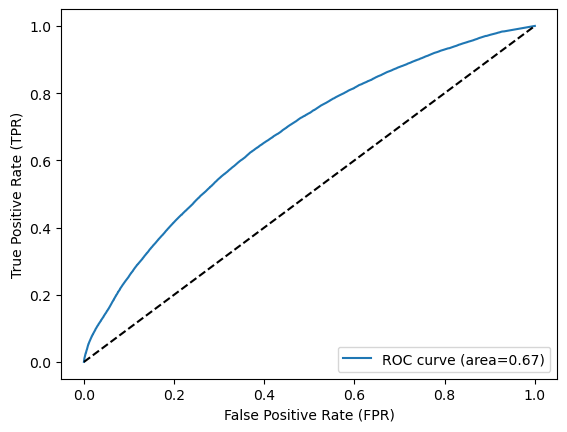

In [26]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area={:.2f})'.format(auc_score))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

## References: 

- https://python.plainenglish.io/roc-auc-in-machine-learning-d70d4308f636